Mini Project: CNN on CIFAR-10

Pre-requisites : Concept to be Acknowledged with

1. Convolution
2. Pooling
3. Flatten + Dense
4. Data Augmentation
5. Transfer Learning
6. CNN Architectures

Import Libraries

In [11]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

Load Data and Preprocess

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model Summary

In [16]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

Training the model

In [17]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zca_epsilon=1e-6)

datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Use datagen.flow for training with data augmentation
model.fit(datagen.flow(x_train, y_train, batch_size=32),
          epochs=50, # Increased epochs since we have early stopping
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 404s 255ms/step - accuracy: 0.3758 - loss: 1.9622 - val_accuracy: 0.5608 - val_loss: 1.2827
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 395s 253ms/step - accuracy: 0.5737 - loss: 1.1962 - val_accuracy: 0.5762 - val_loss: 1.2371
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 399s 255ms/step - accuracy: 0.6270 - loss: 1.0556 - val_accuracy: 0.6873 - val_loss: 0.9053
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 399s 255ms/step - accuracy: 0.6552 - loss: 0.9803 - val_accuracy: 0.6804 - val_loss: 0.9778
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 399s 256ms/step - accuracy: 0.6764 - loss: 0.9257 - val_accuracy: 0.6773 - val_loss: 0.9572
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 433s 277ms/step - accuracy: 0.6927 - loss: 0.8860 - val_accuracy: 0.7134 - val_loss: 0.8257
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 423s 271ms/step - accuracy: 0.7025 - loss: 0.8454 - val_accuracy: 0.6912 - val_loss: 0.9311
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 408s 261ms/step - accuracy: 0.7

Evaluate the model on the test set

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Test loss: 0.5633
Test accuracy: 0.8121


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


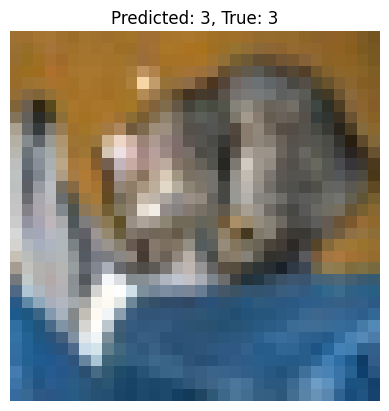

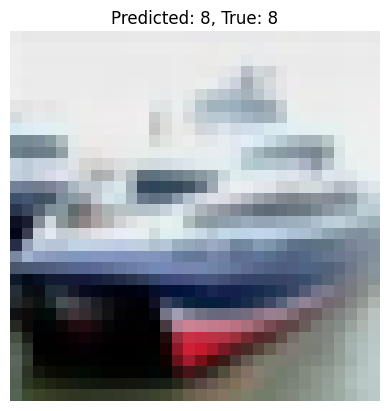

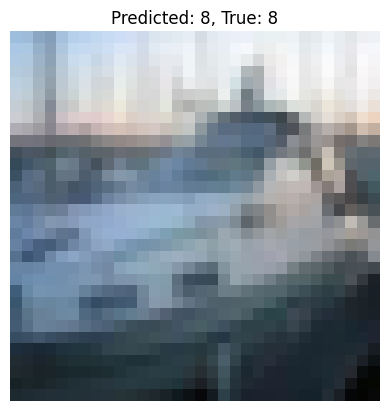

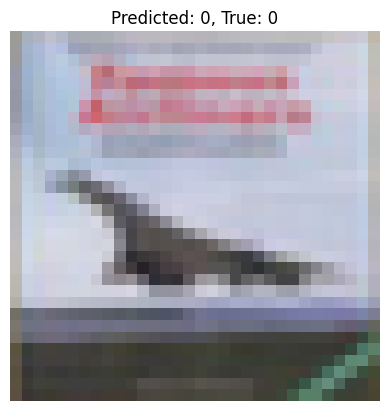

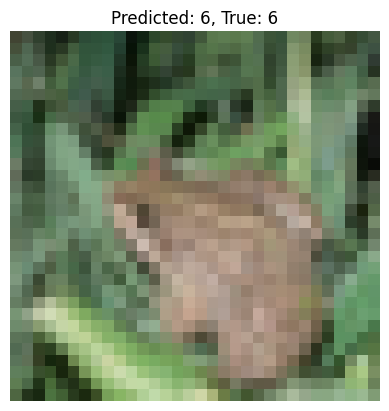

In [19]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(x_test[:5])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:5], axis=1)

for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, True: {true_classes[i]}')
    plt.axis('off')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step


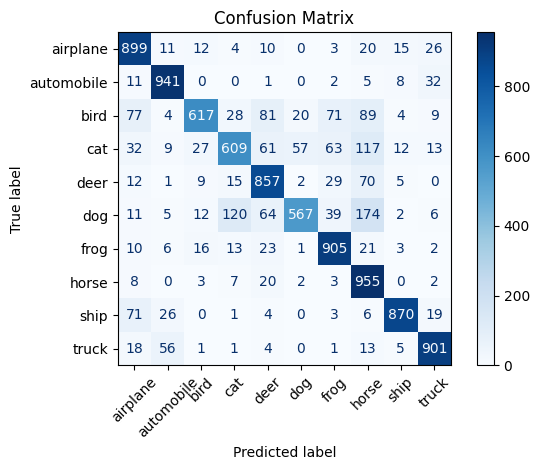

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 class names indirectly
cifar10_labels = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix with class labels from CIFAR-10
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cifar10_labels)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
